In [1]:
import numpy as np
import RockSat_json.RockSat_json as RockSat_json
import Fitting.Fit as R_fitting
import json
# import Fitting.RockSat_1_14_fitting_functions
# import base.operations
import UDIP_Lib.UDIP_4_Lib_V2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [2]:
R = (3./16.) * 0.0254 * 100 #radius of probe
L = (3.25) * 0.0254 * 100 #length of probe
print(R,L)

2 * np.pi * R * L + np.pi * R**2

0.47624999999999995 8.254999999999999


25.414546998483864

Load data, create arrays for composite IV plot and composite number density and temperature plots.  

In [3]:
R = 1.5
4 * np.pi * R**2

28.274333882308138

In [4]:
data = f'../UDIP4/data/json/UDIP_4_800s.json'
figs = '../UDIP4/figs/'


In [5]:
sweep = 100
# V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'][6:]) 
# I = -np.array(packets['packets']['Full'][f'{sweep}']['Current0'][6:]) * 1e9
packets = RockSat_json.import_data(data)
print(packets['packets'].keys())
print(packets['packets']['Dense'][f'{sweep}'].keys())
# len(packets['packets']['Dense'].keys())
# packets['packets']['Full'][f'{sweep}']['Start']/1000

dict_keys(['Sensor', 'Full', 'Dense'])
dict_keys(['Start', 'Stop', 'Count', 'GroundType', 'Voltage', 'Current0', 'Current1', 'Current2', 'PhotoDiodeInitial', 'PhotoDiodeFinal'])


In [6]:
fsw1 = 202; fsw2 = 208
dsw1 = 22; dsw2 = 23
D = 'Dense'
F = 'Full'
ft1 = packets['packets']['Full'][f'{fsw1}']['Start']
ft2 = packets['packets']['Full'][f'{fsw2}']['Stop']

dt1 = packets['packets']['Dense'][f'{dsw1}']['Start']
dt2 = packets['packets']['Dense'][f'{dsw2}']['Stop']

fGT1 = packets['packets']['Full'][f'{fsw1}']['GroundType']
fGT2 = packets['packets']['Full'][f'{fsw2}']['GroundType']
dGT1 = packets['packets'][D][f'{dsw1}']['GroundType']
dGT2 = packets['packets'][D][f'{dsw2}']['GroundType']
print(ft1,ft2)
print(dt1,dt2)

print(fGT1,fGT2)
print(dGT1,dGT2)

185617 188489
183908 187449
0 1
0 1


TypeError: model() missing 1 required positional argument: 'etemp'

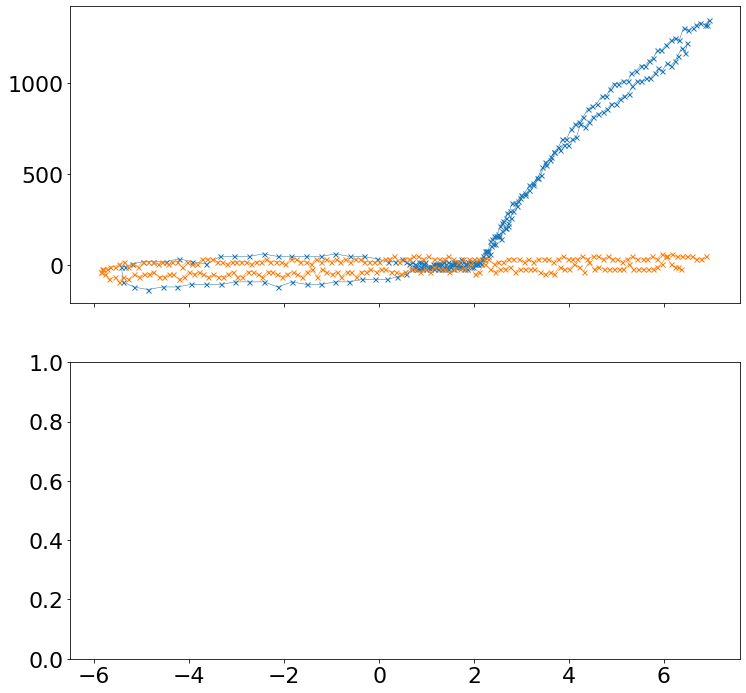

In [7]:

fig, ax = plt.subplots(2,1, figsize = (12, 12), sharex = True)
D = 'Dense'
F = 'Full'
fsw1 = 800; fsw2 = 801
dsw1 = 22; dsw2 = 23
c = 10
fV1 = np.array(packets['packets'][F][f'{fsw1}']['Voltage'][c:]) 
fI1 = -np.array(packets['packets'][F][f'{fsw1}']['Current0'][c:]) * 1e9
fGT1 = packets['packets']['Full'][f'{fsw1}']['GroundType']
fGT2 = packets['packets']['Full'][f'{fsw2}']['GroundType']

dV1 = np.array(packets['packets'][D][f'{dsw1}']['Voltage'][c:]) 
dI1 = -np.array(packets['packets'][D][f'{dsw1}']['Current0'][c:]) * 1e9
dGT1 = packets['packets'][D][f'{dsw1}']['GroundType']
dGT2 = packets['packets'][D][f'{dsw1}']['GroundType']


ax[0].plot(dV1,dI1, label = D, marker = 'x', markersize = 5, linewidth = 0.5)
ax[0].plot(fV1,fI1, label = F, marker = 'x', markersize = 5, linewidth = 0.5)



t, model, popt, pcov = R_fitting.gen_fit(dV1, dI1)
ax[0].plot(t, model,linewidth = 3, label = D + ' Fit')
t, model, popt, pcov = R_fitting.gen_fit(fV1, fI1)
ax[0].plot(t, model,linewidth = 3, label = F + ' Fit')
ax[0].legend(title = 'Ground 'f'{fGT1}', ncol = 2)


fV2 = np.array(packets['packets'][F][f'{fsw2}']['Voltage'][6:]) 
fI2 = -np.array(packets['packets'][F][f'{fsw2}']['Current0'][6:]) * 1e9

dV2 = np.array(packets['packets'][D][f'{dsw2}']['Voltage'][6:]) 
dI2 = -np.array(packets['packets'][D][f'{dsw2}']['Current0'][6:]) * 1e9




ax[1].plot(dV2,dI2, label = D, marker = 'x', markersize = 5, linewidth = 0.5)
ax[1].plot(fV2,fI2, label = F, marker = 'x', markersize = 5, linewidth = 0.5)
t, model, popt, pcov = R_fitting.gen_fit(dV2, dI2)
ax[1].plot(t, model,linewidth = 3, label = D + ' Fit')
t, model, popt, pcov = R_fitting.gen_fit(fV2, fI2)
ax[1].plot(t, model,linewidth = 3, label = F + ' Fit')

ax[1].legend(title = 'Ground 'f'{fGT2}', ncol = 2)
ax[1].set_xlim(-6, 6)
txt = 30
t1 = packets['packets']['Full'][f'{fsw1}']['Start']
t2 = packets['packets']['Full'][f'{fsw2}']['Stop']
print((t2-t1)/1000)
time = (t1 + t2)/2
fig.supylabel(r'$I (nA)$')
ax[1].set_xlabel('Voltage (V)')
ax[0].set_title('t = 'f'{np.round(time/1000, 1) - 57} s')

ax[0].axhline(0, c = 'black', linewidth = 2,linestyle = '--')
ax[1].axhline(0, c = 'black', linewidth = 2,linestyle = '--')
ax[0].grid()
ax[1].grid()
print(popt[4])
fig.savefig(figs + 'UDIP_IV.png')

[ 3.00000000e+00  7.88046927e-01 -1.21397449e+02 -1.00000000e+02
  4.23954494e-09  1.48963838e+04  9.33411263e+03]


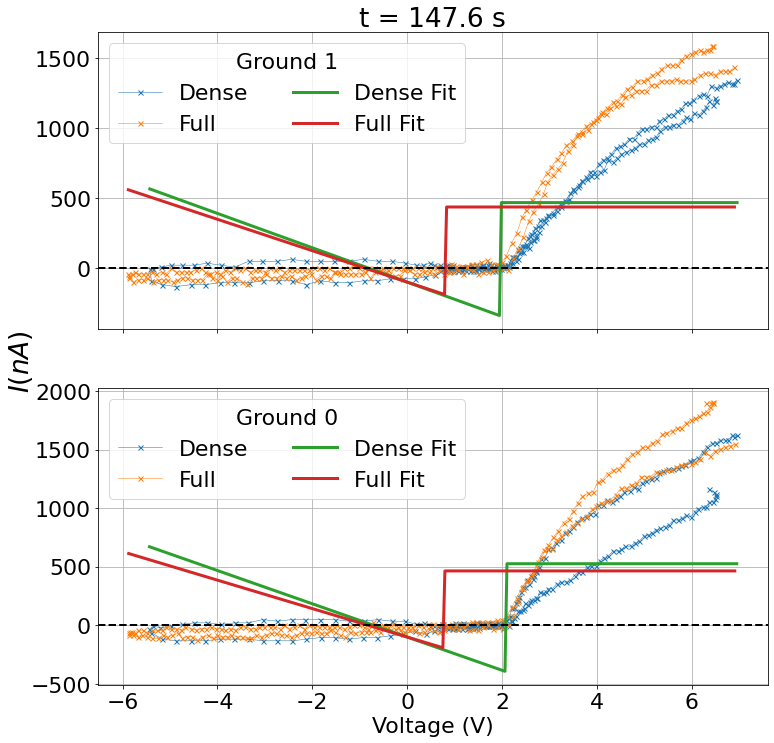

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (12, 12), sharex = True)
D = 'Dense'
F = 'Full'
fsw1 = 284; fsw2 = 217
dsw1 = 22; dsw2 = 23
c = 8

fV1 = np.array(packets['packets'][F][f'{fsw1}']['Voltage'][c:]) 
fI1 = -np.array(packets['packets'][F][f'{fsw1}']['Current0'][c:]) * 1e9
fGT1 = packets['packets']['Full'][f'{fsw1}']['GroundType']
fGT2 = packets['packets']['Full'][f'{fsw2}']['GroundType']

dV1 = np.array(packets['packets'][D][f'{dsw1}']['Voltage'][c:]) 
dI1 = -np.array(packets['packets'][D][f'{dsw1}']['Current0'][c:]) * 1e9
dGT1 = packets['packets'][D][f'{dsw1}']['GroundType']
dGT2 = packets['packets'][D][f'{dsw1}']['GroundType']


ax[0].plot(dV1,dI1, label = D, marker = 'x', markersize = 5, linewidth = 0.5)
ax[0].plot(fV1,fI1, label = F, marker = 'x', markersize = 5, linewidth = 0.5)



t, model, popt, pcov = R_fitting.gen_fit(dV1, dI1)
ax[0].plot(t, model,linewidth = 3, label = D + ' Fit')
t, model, popt, pcov = R_fitting.gen_fit(fV1, fI1)
ax[0].plot(t, model,linewidth = 3, label = F + ' Fit')
ax[0].legend(title = 'Ground 'f'{fGT1}', ncol = 2)


fV2 = np.array(packets['packets'][F][f'{fsw2}']['Voltage'][6:]) 
fI2 = -np.array(packets['packets'][F][f'{fsw2}']['Current0'][6:]) * 1e9

dV2 = np.array(packets['packets'][D][f'{dsw2}']['Voltage'][6:]) 
dI2 = -np.array(packets['packets'][D][f'{dsw2}']['Current0'][6:]) * 1e9




ax[1].plot(dV2,dI2, label = D, marker = 'x', markersize = 5, linewidth = 0.5)
ax[1].plot(fV2,fI2, label = F, marker = 'x', markersize = 5, linewidth = 0.5)
t, model, popt, pcov = R_fitting.gen_fit(dV2, dI2)
ax[1].plot(t, model,linewidth = 3, label = D + ' Fit')
t, model, popt, pcov = R_fitting.gen_fit(fV2, fI2)
ax[1].plot(t, model,linewidth = 3, label = F + ' Fit')

ax[1].legend(title = 'Ground 'f'{fGT2}', ncol = 2)
# ax[1].set_xlim(-6, 6)
txt = 30
t1 = packets['packets']['Full'][f'{fsw1}']['Start']
t2 = packets['packets']['Full'][f'{fsw2}']['Stop']
time = (t1 + t2)/2
fig.supylabel(r'$I (nA)$')
ax[1].set_xlabel('Voltage (V)')
ax[0].set_title('t = 'f'{np.round(time/1000, 1) - 57} s')

ax[0].axhline(0, c = 'black', linewidth = 2,linestyle = '--')
ax[1].axhline(0, c = 'black', linewidth = 2,linestyle = '--')
ax[0].grid()
ax[1].grid()
print(popt)
fig.savefig(figs + 'UDIP_IV.png')

In [ ]:

# fig, ax = plt.subplots(2,1, figsize = (12, 12), sharex = True)
# D = 'Dense'
# F = 'Full'
# sw1 = 21; sw2 = 22
# V = np.array(packets['packets'][D][f'{sw1}']['Voltage'][6:]) 
# I = -np.array(packets['packets'][D][f'{sw1}']['Current0'][6:]) * 1e9
# GT = packets['packets'][D][f'{sw1}']['GroundType']

# t, model, popt, pcov = R_fitting.gen_fit(V, I)

# ax[0].plot(V,I, label = 'Data', marker = 'x')
# ax[0].plot(t, model, label = 'Fit')
# ax[0].legend(title = 'Ground 'f'{GT}')
# #####

# V = np.array(packets['packets'][D][f'{sw2}']['Voltage'][6:]) 
# I = -np.array(packets['packets'][D][f'{sw2}']['Current0'][6:]) * 1e9
# GT = packets['packets'][D][f'{sw2}']['GroundType']
# t, model, popt, pcov = R_fitting.gen_fit(V, I)
# ax[1].plot(V,I, label = 'Data', marker = 'x')
# ax[1].plot(t, model, label = 'Fit')
# ax[1].legend(title = 'Ground 'f'{GT}')
# ax[1].set_xlim(-6, 6)
# txt = 30
# t1 = packets['packets'][D][f'{sw1}']['Start']
# t2 = packets['packets'][D][f'{sw2}']['Stop']
# print((t2-t1)/1000)
# time = (t1 + t2)/2
# fig.supylabel(r'$I (nA)$')
# ax[1].set_xlabel('Voltage (V)')
# ax[0].set_title('Dense Sweep; t = 'f'{np.round(time/1000, 1)} s')

# ax[0].axhline(0, c = 'red', linestyle = '--')
# ax[1].axhline(0, c = 'red', linestyle = '--')
# ax[0].grid()
# ax[1].grid()
# fig.savefig(figs + 'UDIP_IV.png')

In [ ]:
def data_processing(x_raw,y_raw):#remove data points below -2 and above the peak to reduce datapoints going to the fitting routine
    max_ind = np.argmax(y_raw) #find index of maximum y
    if (max_ind.size != 1):
        min_max_val = np.argmin(x_raw[max_ind]) #find minimum x of max y
    else:
        min_max_val = max_ind
    ind_high = np.where(x_raw > x_raw[min_max_val] + 0.1) # find indexs of x greater than 0.1 more than max y
    ind_low = np.where(x_raw < 0) #find indexs of x less than 0
    ind_rem = np.concatenate((ind_high,ind_low),axis=None)
    x = np.delete(x_raw,ind_rem) #remove from x
    y = np.delete(y_raw,ind_rem) #remove from y
    return x,y

In [ ]:
print(len(packets['packets']['Full']['800']['Current0']))
print(packets['packets']['Full']['800']['Current0'])


V = np.array(packets['packets']['Full']['801']['Voltage'][c:]) 
I = -np.array(packets['packets']['Full']['801']['Current0'][c:]) * 1e9
x, y = data_processing(V, I)
starting_sweep = 0
stopping_sweep = 284
step           = 1
for sweep in range(starting_sweep, stopping_sweep, step):
    c = 6
    V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'][c:]) 
    I = -np.array(packets['packets']['Full'][f'{sweep}']['Current0'][c:]) * 1e9
    x, y = data_processing(V, I)
    if len(y) < 100:
        print(len(y))

256
[-5.780791788856305e-07, -3.691348973607056e-07, -2.2983870967741992e-07, -1.7412023460410353e-07, -1.1840175953079068e-07, -6.268328445747784e-08, -7.661290322580783e-08, -3.482404692082497e-08, -3.482404692082497e-08, -2.089442815249143e-08, 2.089442815249498e-08, 6.964809384161441e-09, 6.964809384161441e-09, -6.964809384164994e-09, -4.875366568914785e-08, -6.964809384164994e-09, 6.964809384161441e-09, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, -6.964809384164994e-09, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, 2.089442815249498e-08, 6.964809384161441e-09, 2.089442815249498e-08, -2.089442815249143e-08, 3.4824046920817864e-08, 6.964809384161441e-09, -6.964809384164994e-09, 2.089442815249498e-08, 2.089442815249498e-08, 6.964809384161441e-09, 4.87536656891514e-08, 3.4824046920817864e-08, 4.87536656891514e-08, 3.4824046920817864e-08, 2.089442815249498e-08, 2.0894428

In [ ]:
packets = RockSat_json.import_data(data)
ne = np.array([])
Te = np.array([])
Imax = np.array([])
t_lin = np.array([])
starting_sweep = 0
stopping_sweep = 500
st = packets['packets']['Full'][f'{starting_sweep}']['Start']
fin = packets['packets']['Full'][f'{stopping_sweep}']['Start']
# print((st/1000) - 57,(fin/1000) - 57)
# print(len(packets['packets']['Full']))
step           = 1
for sweep in range(starting_sweep, stopping_sweep, step):
    c = 6
    V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'][c:]) 
    I = -np.array(packets['packets']['Full'][f'{sweep}']['Current0'][c:]) * 1e9
    t, model, popt, pcov = R_fitting.gen_fit(V, I)
    start = packets['packets']['Full'][f'{sweep}']['Start']
    stop  = packets['packets']['Full'][f'{sweep}']['Stop']
    t_lin = np.append(t_lin, (start + stop)/2/1000 - 57)
    ne = np.append(ne,popt[3])
    Te = np.append(Te,popt[4])
    Imax = np.append(Imax, np.max(I))

Create plots

In [ ]:
start = packets['packets']['Sensor'][f'3000']['Start']/1000
print(start)

288.961


In [ ]:
avg = np.arange(0, len(ne), 5)
ne_av = np.array([])
Te_av = np.array([])
tav_lin = np.array([])
for i in avg:
  tav_lin = np.append(tav_lin,np.average(t_lin[i:(i+6)]))
  Te_av = np.append(Te_av,np.average(Te[i:(i+6)]))
  ne_av = np.append(ne_av,np.average(ne[i:(i+6)]))

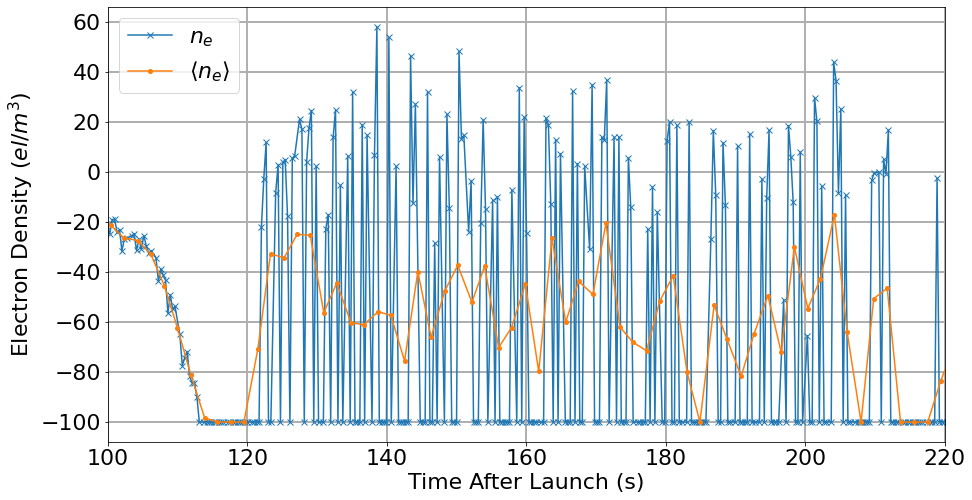

In [ ]:
# start = packets['packets']['Full'][f'{starting_sweep}']['Start']/1000
# stop  = packets['packets']['Full'][f'{stopping_sweep}']['Start']/1000
# tav_lin = np.linspace(start, stop, len(ne_av))
fig, ax = plt.subplots(1,1, figsize = (15, 8))
ax.plot(t_lin , ne, marker = 'x', label = r'$n_e$')
ax.plot(tav_lin , ne_av, marker = '.', markersize = 8, label = r'$\langle n_e \rangle$')
ax.legend()
ax.grid(linewidth = 2)
ax.set_xlim(100,220)
ax.set_xlabel('Time After Launch (s)')
ax.set_ylabel(r'Electron Density $(el/m^3)$')
fig.savefig(figs + 'ne.png')

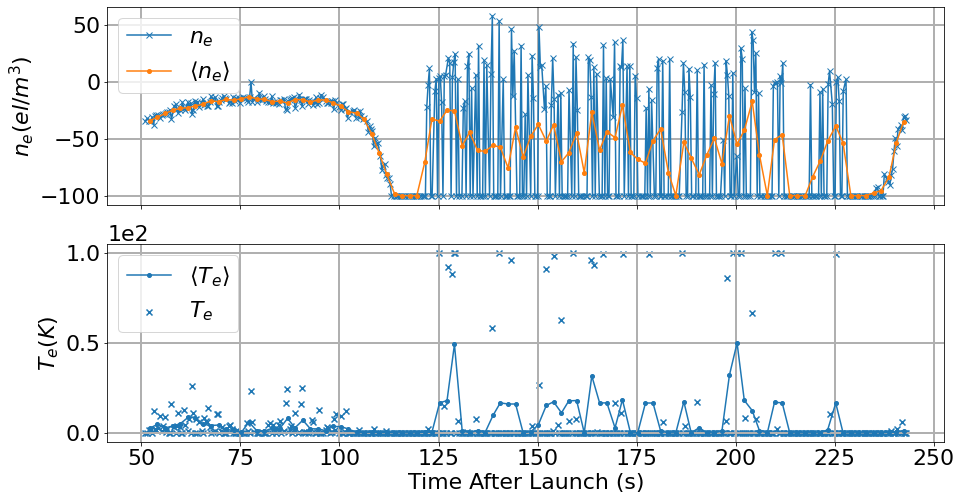

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (15, 8), sharex = True)
ax[0].plot(t_lin, ne, marker = 'x', label = r'$n_e$')
ax[0].plot(tav_lin, ne_av, marker = '.', markersize = 8, label = r'$\langle n_e \rangle$')
ax[0].legend()
ax[0].grid(linewidth = 2)
# ax[0].set_xlabel('Time After Launch (s)')
ax[0].set_ylabel(r'$n_e (el/m^3)$')
ax[1].scatter(t_lin, Te, marker = 'x', label = r'$T_e$')
ax[1].plot(tav_lin, Te_av, marker = '.', markersize = 8, label = r'$\langle T_e \rangle$')
ax[1].grid(linewidth = 2)
ax[1].set_xlabel('Time After Launch (s)')
ax[1].set_ylabel(r'$T_e (K)$')
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax[1].set_ylim(0, 4000)
# ax[1].set_xlim(110, 221)
ax[1].legend(loc = 'upper left')
fig.savefig(figs + 'ne_Te.png')